# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>

## <span style="color:blue">1- Data Preparation</span>

In [82]:
import os
os.chdir('D:\Projects\Computer Vision\Potato Disease Classification')

os.getcwd()

'D:\\Projects\\Computer Vision\\Potato Disease Classification'

In [83]:
pwd

'D:\\Projects\\Computer Vision\\Potato Disease Classification'

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
data = image_dataset_from_directory('Dataset')

Found 2152 files belonging to 3 classes.


In [76]:
labels = data.class_names
labels

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [5]:
len(data)

68

In [6]:
for batch, classes in data.take(1):
    print(batch.shape)
    print(len(labels))

(32, 256, 256, 3)
3


In [7]:
import matplotlib.pyplot as plt

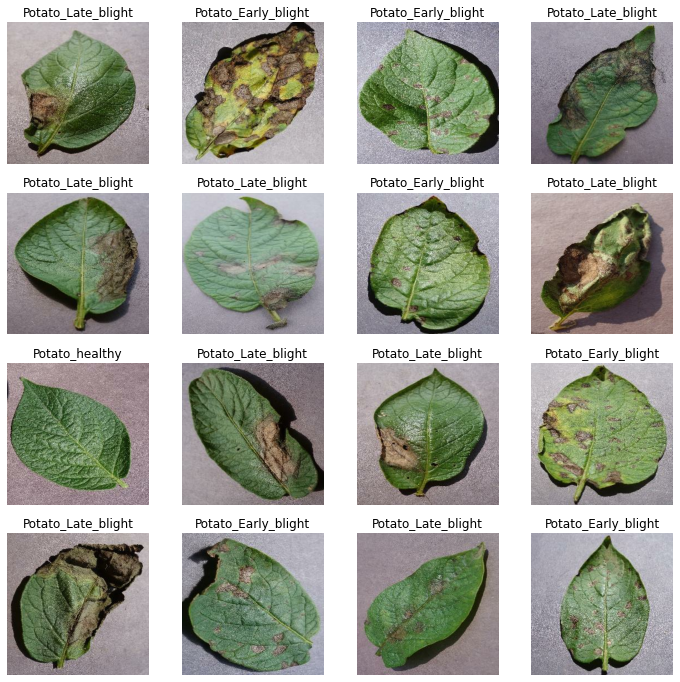

In [8]:
plt.figure(figsize=(12, 12))

for batch, classes in data.take(1):
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(batch[i].numpy().astype('uint32'))
        plt.title(labels[classes[i].numpy()])
        plt.axis('off')

### <span style="color:chocolate">Data Splitting</span>

In [9]:
training_data = data.take(int(len(data)*0.8))
len(training_data)

54

In [10]:
testing_data = data.skip(54)
len(testing_data)

14

In [11]:
val_data = testing_data.take(int(len(data)*0.1))
len(val_data)

6

In [12]:
testing_data = testing_data.skip(6)
len(testing_data)

8

In [13]:
from tensorflow.data import AUTOTUNE

In [14]:
training_data = training_data.cache().shuffle(1000).prefetch(AUTOTUNE)
val_data = val_data.cache().shuffle(500).prefetch(AUTOTUNE)
testing_data = testing_data.cache().shuffle(256).prefetch(AUTOTUNE)

### <span style="color:chocolate">Resizing and rescaling layer preparation</span>

In [15]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.models import Sequential

In [16]:
resizing_and_rescaling_layers = Sequential([
                                            Resizing(256, 256),
                                            Rescaling(1/255.0)
                                        ])

### <span style="color:chocolate">Data Augmentation</span>

In [17]:
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom, RandomRotation

In [18]:
augmentation_layers = Sequential([
                                    RandomZoom(0.6),
                                    RandomRotation(0.34),
                                ])

## <span style="color:blue">2- Model Training</span>

### <span style="color:chocolate">Architecture Building</span>

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [20]:
model = Sequential([
    resizing_and_rescaling_layers,
    augmentation_layers,
    Conv2D(32, 3, activation='relu', input_shape=(32, 256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(128, 'relu'),
    Dense(32, 'relu'),
    Dense(3, 'softmax'),
    
])

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
model.build((32, 256, 256, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### <span style="color:chocolate">Model Compilation and Training</span>

In [23]:
model.compile(
    'Adam',
    'SparseCategoricalCrossentropy',
    ['accuracy']
)

In [24]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=6, restore_best_weights=True)

In [46]:
history = model.fit(
    training_data,
    epochs=4,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/4
54/54 [==============================] - 89s 2s/step - loss: 0.4907 - accuracy: 0.8079 - val_loss: 0.2928 - val_accuracy: 0.8854
Epoch 2/4
54/54 [==============================] - 103s 2s/step - loss: 0.2966 - accuracy: 0.8848 - val_loss: 0.4050 - val_accuracy: 0.8646
Epoch 3/4
54/54 [==============================] - 106s 2s/step - loss: 0.3356 - accuracy: 0.8721 - val_loss: 0.3733 - val_accuracy: 0.8490
Epoch 4/4
54/54 [==============================] - 105s 2s/step - loss: 0.2657 - accuracy: 0.9016 - val_loss: 0.2243 - val_accuracy: 0.9219


## <span style="color:blue">3- Model Testing and Performance Plotting</span>

In [47]:
preformance = model.evaluate(testing_data)

8/8 [==============================] - 3s 407ms/step - loss: 0.1999 - accuracy: 0.9224


In [48]:
preformance

[0.19988399744033813, 0.9224137663841248]

In [49]:
history.params

{'verbose': 1, 'epochs': 4, 'steps': 54}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
history.history['accuracy']

[0.8078703880310059,
 0.8848379850387573,
 0.8721064925193787,
 0.9016203880310059]

In [52]:
no_of_epochs = history.params['epochs']
len(history.history['accuracy']) == no_of_epochs

True

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

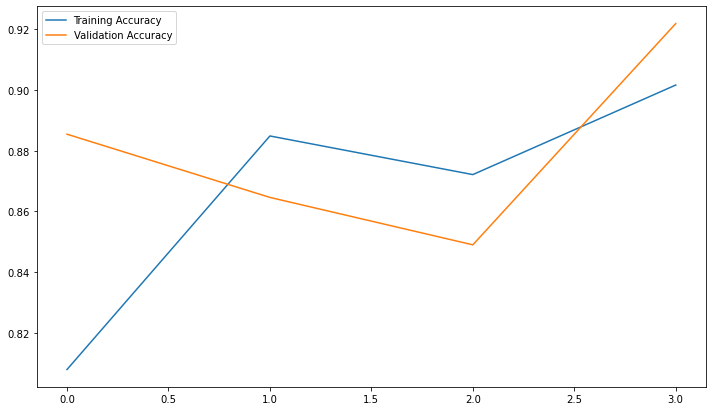

In [54]:
plt.figure(figsize=(12, 7))

plt.plot(range(no_of_epochs), acc, label='Training Accuracy')
plt.plot(range(no_of_epochs), val_acc, label='Validation Accuracy')

plt.legend()
plt.show()

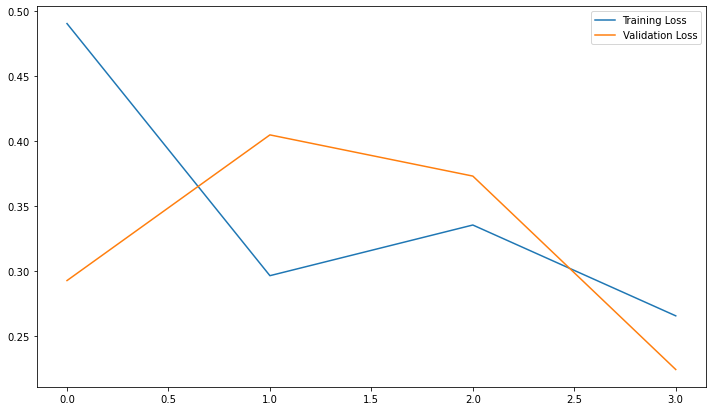

In [55]:
plt.figure(figsize=(12, 7))

plt.plot(range(no_of_epochs), loss, label='Training Loss')
plt.plot(range(no_of_epochs), val_loss, label='Validation Loss')

plt.legend()
plt.show()

## <span style="color:blue">3- Prediction / Inference</span>

In [57]:
import numpy as np

actual label: Potato_Early_blight
predicted label: Potato_Early_blight


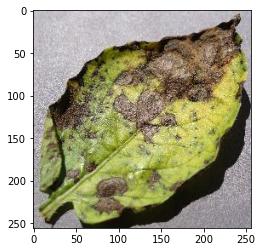

In [60]:
for images_batch, labels_batch in testing_data.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [78]:
from tensorflow import expand_dims, newaxis

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

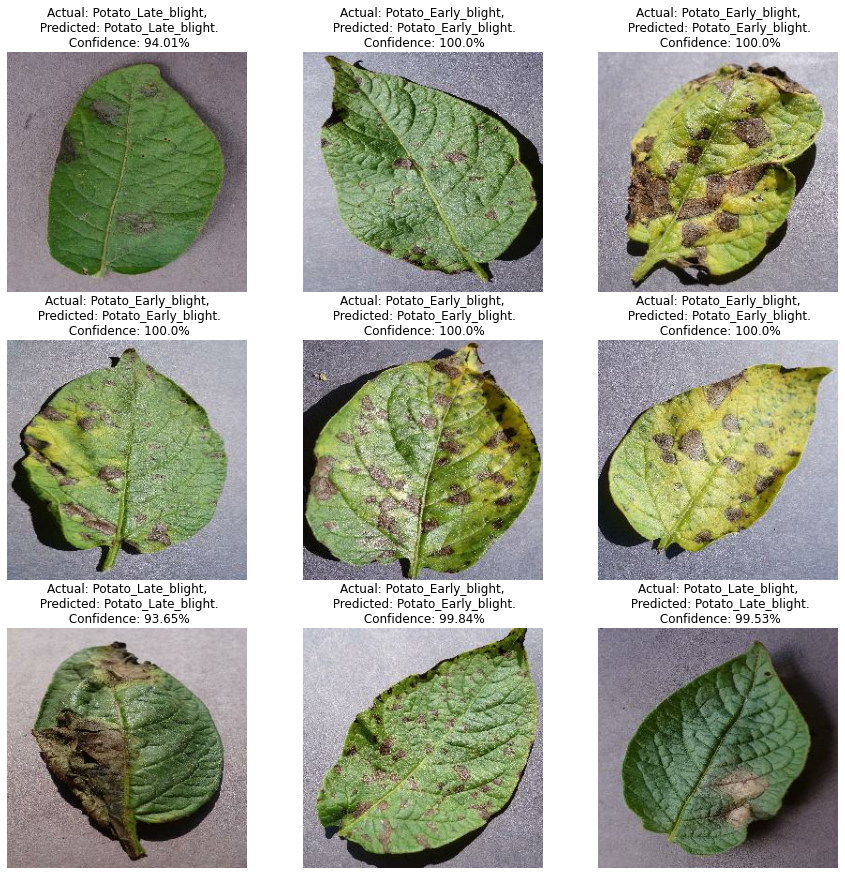

In [79]:
plt.figure(figsize=(15, 15))

for images, lbs in testing_data.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## <span style="color:blue">4- save / export the model</span>

In [98]:
os.mkdir('models')

In [142]:
last_version = max([int(i) for i in os.listdir('models')+[0]])
os.mkdir(f'models/{last_version+1}')

In [143]:
model.save(f'models/{last_version+1}')

INFO:tensorflow:Assets written to: models/2\assets


## <span style="color:blue">5- Model Deployment</span>

### <span style="color:chocolate">I'm going to implement this phase in a separate notebook</span>

<br>**You can pick up the repo for this project on my GitHub from [here](https://github.com/a00ayad00/Potato-Disease-Classification)**